In [3]:
import dca_v2

Nombre de campo/contrato/asignacion: BENAVIDES
Numero de campos de analisis: 
Analisis DCA Analogos (Y/''): Y
Tomar muestra desde fecha (yyyy-mm-dd): 
Generar archivos (Y/''): Y
Generar Plots (Y/''): Y


'Número de pozos en BENAVIDES: 128'

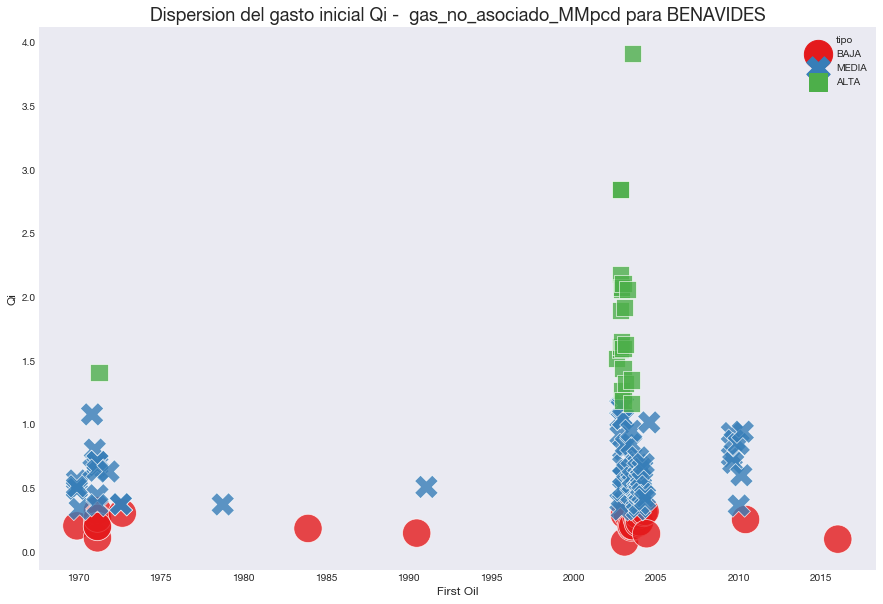

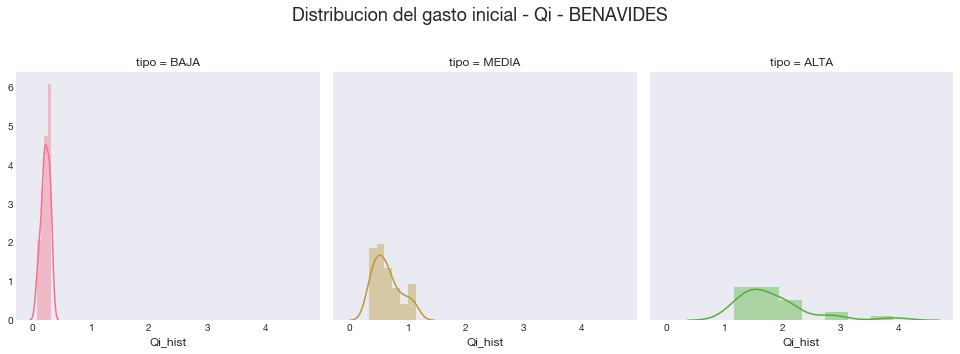

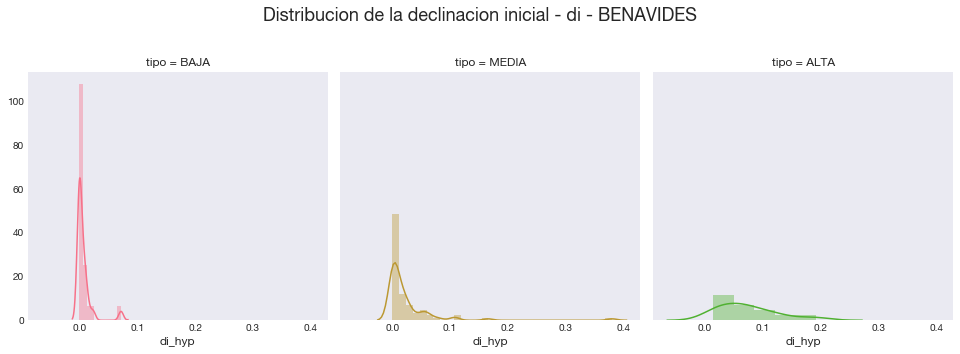

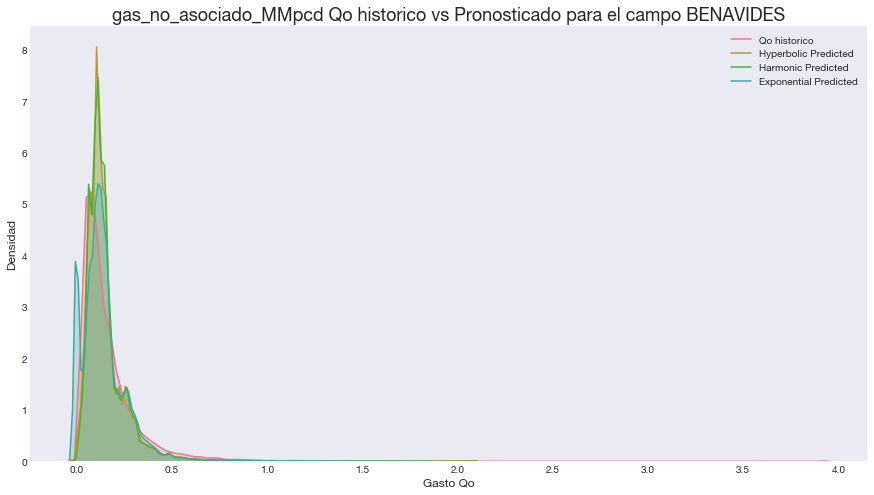

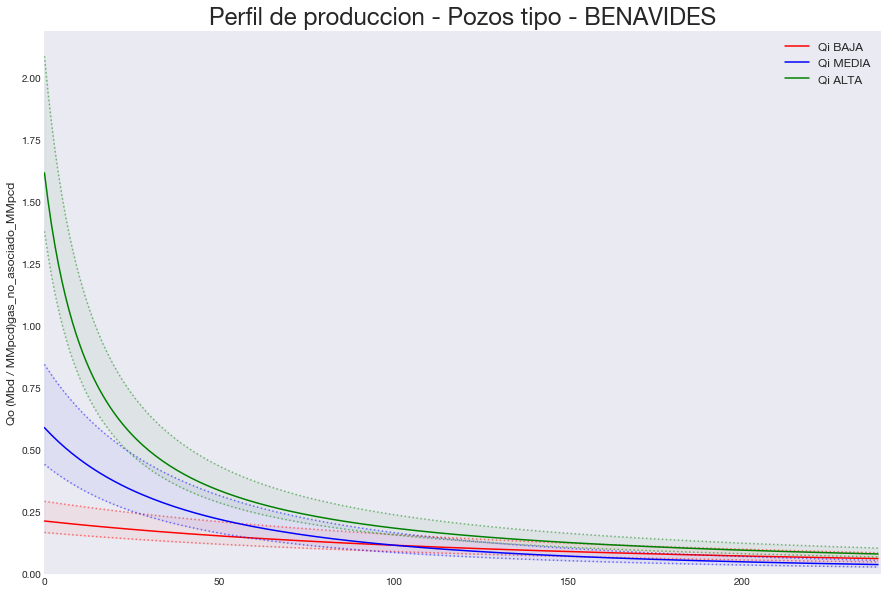

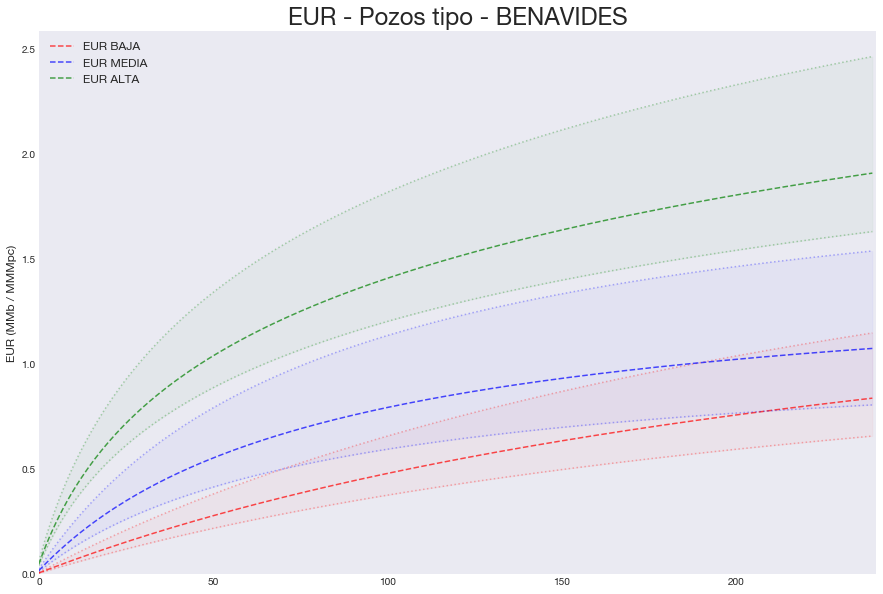

'Número de campos muestra para BENAVIDES: 15'

'Numero de campos analogos: 4'

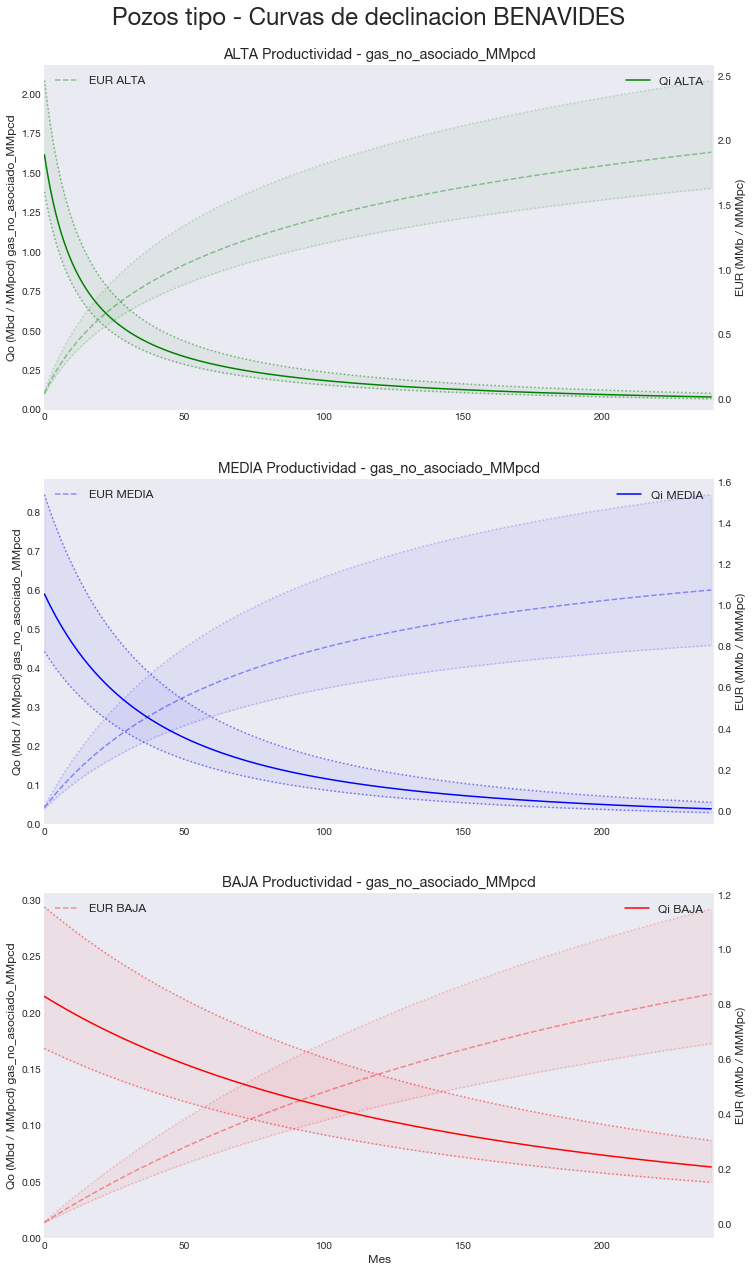

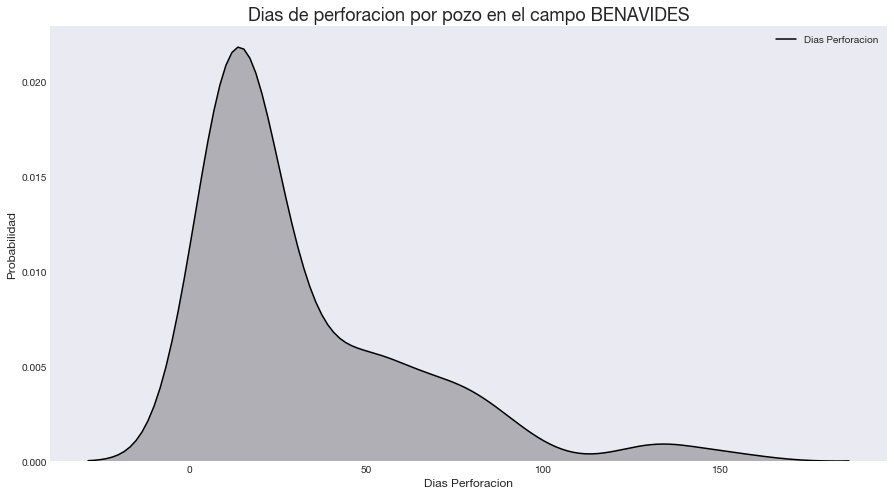

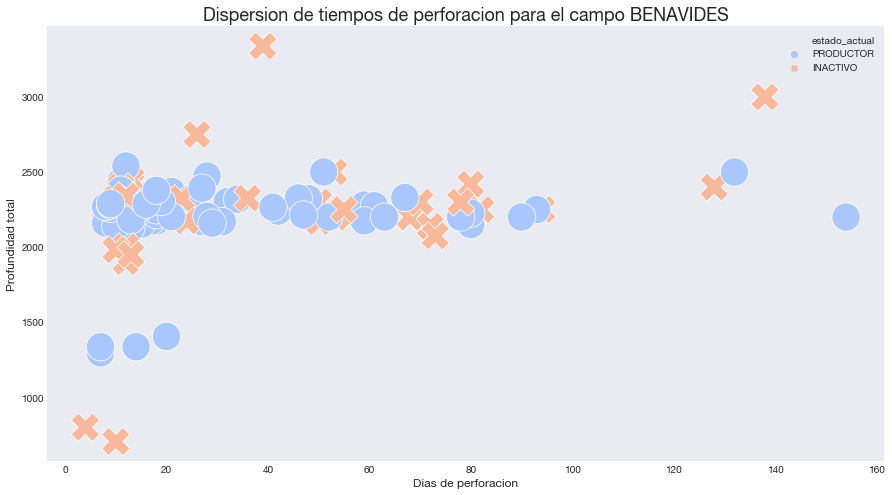

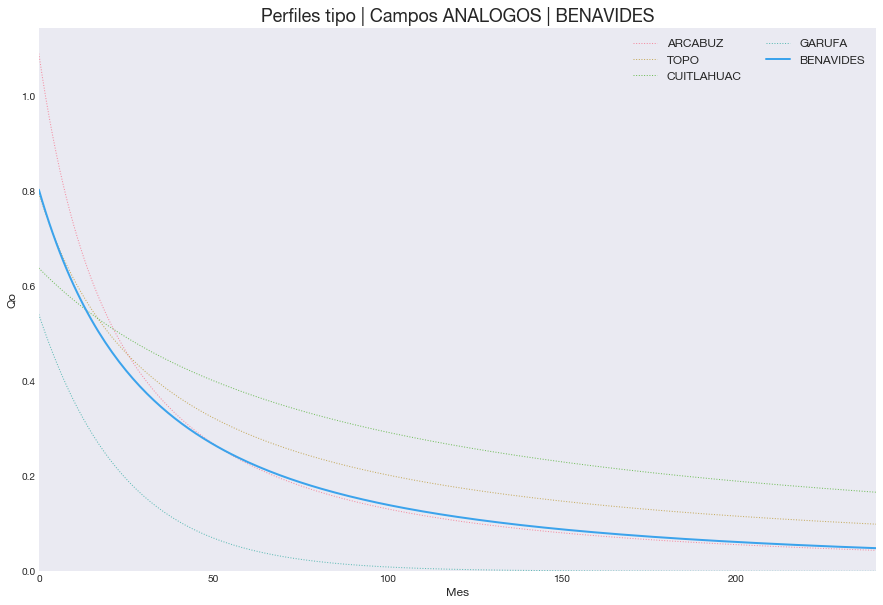

4

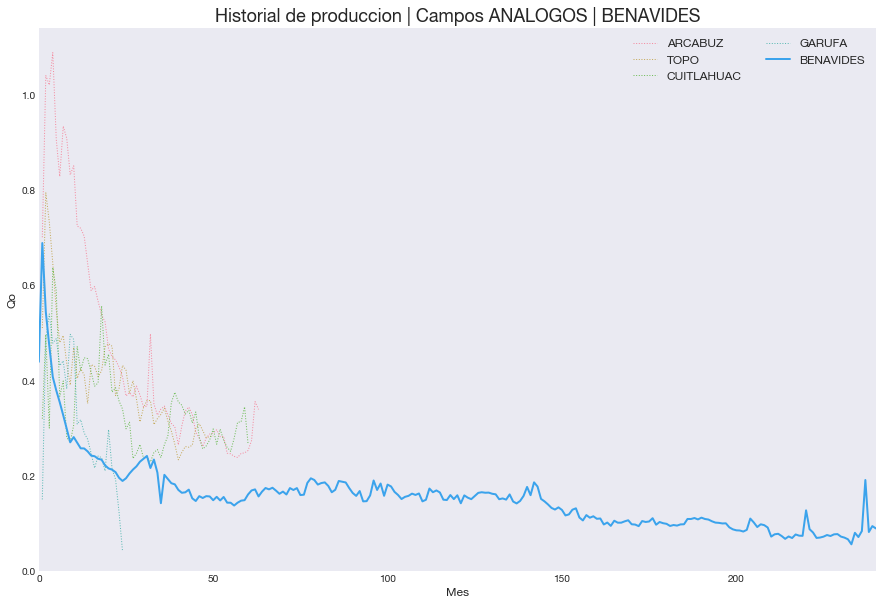

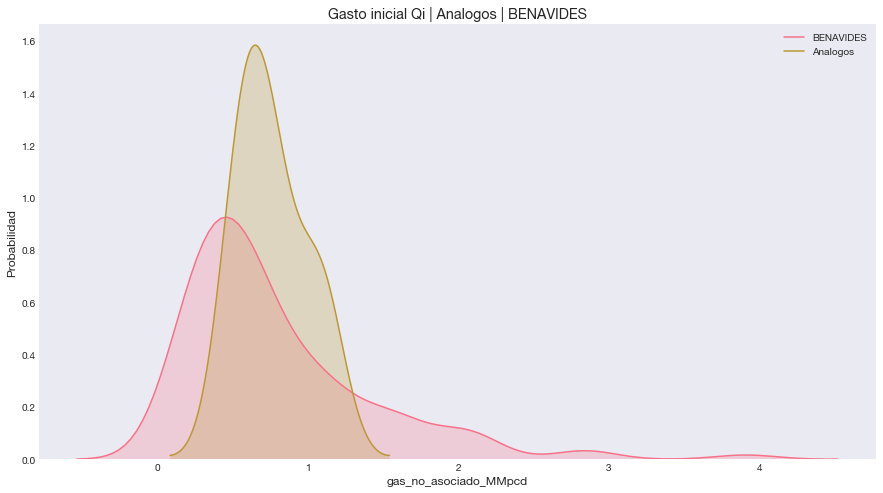

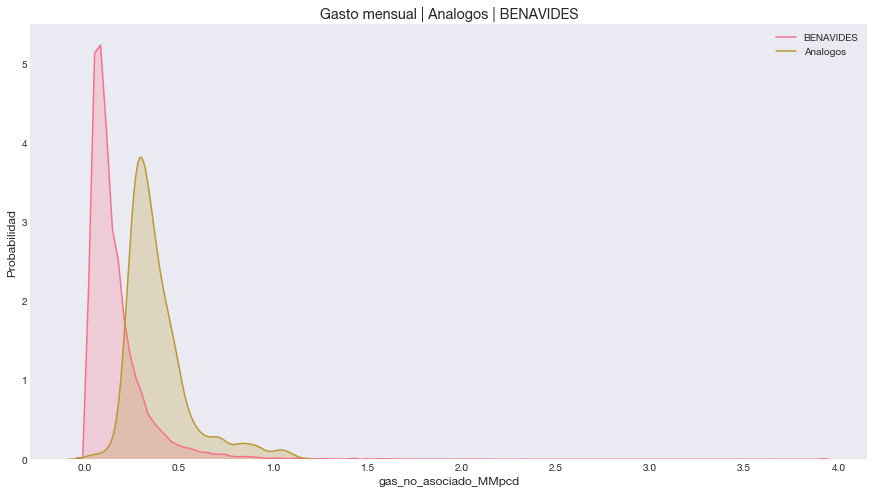

In [4]:
dca_v2.run()

In [5]:
from dca_v2 import *

In [6]:
df_info = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/info_campo.csv').transpose()

In [7]:
display(df_info)

0
Unnamed: 0                                                           118
NOMBRE                                                         BENAVIDES
ZONA                                                              Burgos
ESTADO                                                        Tamaulipas
AREA                                                              129.20
ANO DE DESCUBRIMIENTO                                           1,960.00
ASIGNACION                                           CNH-R01-L03-A2/2015
OPERADOR               Consorcio Petrolero 5m del Golfo, S.A.P.I. de ...
VIGENCIA                                                        2,041.00
ESTATUS                                                        Productor

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re

df = info_campo.copy()
df = df.transpose()

display(df)

118
NOMBRE                                                         BENAVIDES
ZONA                                                              Burgos
ESTADO                                                        Tamaulipas
AREA                                                              129.20
ANO DE DESCUBRIMIENTO                                           1,960.00
ASIGNACION                                           CNH-R01-L03-A2/2015
OPERADOR               Consorcio Petrolero 5m del Golfo, S.A.P.I. de ...
VIGENCIA                                                        2,041.00
ESTATUS                                                        Productor

In [9]:
fig = make_subplots(
    rows=2, cols=2,
    vertical_spacing=0.05,
    specs=[[{"type": "table"},
           {"type": "table"}],
           [{"type": "table"},
           {"type": "table"}]],
          
)


fig.add_trace(
    go.Table(
        header=dict(
            values=['<b>Descripcion del campo</b>','<b>Datos</b>'],
            font=dict(size=18,
                      family='Helvetica Neue'),
            height=40,
            align="left"
        ),
        cells=dict(
            values=[[k for k in df.index[:5]],
                    [j for j in df.values[:5]]],
            font=dict(size=18,
                     family='Helvetica Neue'),
            height=40,
            align = "left")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['<b>Situacion contractual</b>','<b>Datos</b>'],
            font=dict(size=18),
            height=40,
            align="left"
        ),
        cells=dict(
            values=[[k for k in df.index[5:]],
                    [j for j in df.values[5:]]],
            font=dict(size=18,
                     family='Helvetica Neue'),
            height=40,
            align = "left")
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['<b>Hidrocarburos</b>','<b>Datos</b>'],
            font=dict(size=18, 
                      family='Helvetica Neue'),
            height=40,
            align="left"
        ),
        cells=dict(
            values=[[k for k in df.index[5:]],
                    [j for j in df.values[5:]]],
            font=dict(size=18,
                      family='Helvetica Neue'),
            height=40,
            align = "left")
    ),
    row=1, col=2

)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="<b>Informacion general del campo</b> "+str(input_campo),
    font=dict(size=20,
              family='Helvetica Neue')
)

fig.show()

In [10]:
import plotly.express as px

In [11]:
df_resumen = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/resumen.csv',
                        header=0,
                        index_col=0)

In [12]:
display(df_resumen)

0
Pozos perforados                                               128
Pozos productores                                              119
Pozos secos                                                      9
Exito mecanico (%)                                        92.96875
Pozos activos                                                   83
Pozos cerrados                                                  36
EUR por pozo (MMb)                                             0.0
EUR maxima (MMb)                                2.5115695073343587
Produccion media mensual (Mbd)                      0.112184783308
Pico de producción mensual (MMb)                          3.910253
Hidrocarburo principal                       gas_no_asociado_MMpcd
Hidrocarburo secundario                      gas_no_asociado_MMpcd
Produccion actual de gas_no_asociado_MMpcd                     0.0
Progduccion actual de gas_no_asociado_MMpcd      9.172481720309298
Produccion actual de condensado_Mbd                            0.0
RGA pc/b                                                    1000.0
Corte de agua %                                                inf
Gravedad API                                                   NaN
C1                                                             NaN
C2                                                             NaN
C3                                                             NaN
C4                                                             NaN
C5+                                                            NaN
Np                                                             0.0
Gp                                              122.23997536794634
Cp                                             0.09747714000000002
Wp                                              1.3192643250179044
Gas Equivalente                                 20.373329227991057
OOIP                                                           0.0
FR Aceite                                                      NaN
OGIP                                                           0.0
FR Gas                                                         inf

In [13]:
df_pozos=df_resumen.loc[['Pozos productores','Pozos secos']]
display(df_pozos)

df_activos=df_resumen.loc[['Pozos activos','Pozos cerrados']]

status=serie_resumen.estado_actual.value_counts()
display(status)

arq=serie_resumen.trayectoria.value_counts()
display(arq)

0
Pozos productores  119
Pozos secos          9

PRODUCTOR    83
INACTIVO     36
Name: estado_actual, dtype: int64

VERTICAL       98
DIRECCIONAL    21
Name: trayectoria, dtype: int64

In [14]:
pozos1= px.pie(df_pozos,values=df_pozos.values, names=df_pozos.index, title='Pozos perforados: ')
pozos1.show()

pozos2= px.pie(df_activos,values=df_activos.values, names=df_activos.index, title='Pozos perforados: ')
pozos2.show()

pozos3= px.pie(status,values=status.values, names=status.index, title='Pozos perforados: ')
pozos3.show()

pozos4=px.bar(arq, x=arq.values, y=arq.index, orientation='h')
pozos4.show()

In [15]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_campo.csv',
                        header=0,
                        index_col=0)
df=df.groupby(by='pozo').mean()
intervenciones=df.ano_de_perforacion.value_counts()
intervenciones.index=pd.Index.astype(intervenciones.index,dtype='int64')
intervenciones=intervenciones.sort_index(ascending=True)

In [16]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_campo.csv')
df['fecha']=pd.to_datetime(df['fecha'],dayfirst=True)
df=df.set_index('fecha')
produccion=df.resample('Y').mean()
produccion['year']=produccion.index.year

In [17]:
# Sessions Graphs 
from plotly import subplots
perforaciones = go.Bar(
  x=intervenciones.index,
  y=intervenciones.values,
  name='Intervenciones',
  text='Intervenciones'
)
prod_aceite = go.Scatter(
  x=produccion.year,
  y=produccion.aceite_Mbd,
  name='Aceite Mbd',
  text='Produccion aceite'
)

prod_equiv = go.Scatter(
  x=produccion.year,
  y=produccion.Mbpced,
  name='Equivalente Mbpced',
  text='Produccion equivalente'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(perforaciones,row=1, col=1, secondary_y=False)
fig.add_trace(prod_aceite, row=1, col=1, secondary_y=True)
fig.add_trace(prod_equiv, row=1, col=1, secondary_y=True)


fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")


fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig['layout'].update(
  height= 600,
  width=1500, 
  showlegend=True, 
  xaxis=dict(
    # tickmode='linear',
    # ticks='outside',
    # tick0=1,
    dtick=5,
    ticklen=8,
    tickwidth=2,
    tickcolor='#000',
    showgrid=True,
    zeroline=True,
    # showline=True,
    # mirror='ticks',
    # gridcolor='#bdbdbd',
    gridwidth=2
),
  )

fig.show()

In [18]:
# Sessions Graphs 
from plotly import subplots

prod_aceite = go.Scatter(
  x=produccion.year,
  y=produccion.aceite_Mbd,
  name='Aceite Mbd',
  text='Produccion aceite'
)

prod_gas = go.Scatter(
  x=produccion.year,
  y=produccion.gas_asociado_MMpcd,
  name='Gas MMpcd',
  text='Produccion equivalente'
)

prod_condensado = go.Scatter(
  x=produccion.year,
  y=produccion.condensado_Mbd,
  name='Condensado Mbd',
  text='Condensado'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(prod_aceite, row=1, col=1, secondary_y=False)
fig.add_trace(prod_gas, row=1, col=1, secondary_y=True)
fig.add_trace(prod_condensado, row=1, col=1, secondary_y=False)


fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")


fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig['layout'].update(
  height=600,
  width=1500, 
  showlegend=True, 
  xaxis=dict(
    # tickmode='linear',
    # ticks='outside',
    # tick0=1,
    dtick=5,
    ticklen=8,
    tickwidth=2,
    tickcolor='#000',
    showgrid=True,
    zeroline=True,
    # showline=True,
    # mirror='ticks',
    # gridcolor='#bdbdbd',
    gridwidth=2
),
  )

fig.show()

In [19]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_tipos.csv',
                header=0,
                index_col=0
                )

In [20]:
tipos=df.tipo.value_counts()
display(tipos)

MEDIA    71
ALTA     24
BAJA     24
Name: tipo, dtype: int64

In [21]:
pozos_tipo= px.pie(tipos,values=tipos.values, names=tipos.index, title='<b>Distribucion de pozos tipo</b>')
pozos_tipo.show()

In [22]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_campo.csv')
df['fecha']=pd.to_datetime(df['fecha'],dayfirst=True)
df=df.set_index('fecha')
produccion=df.resample('Y').mean()
produccion['year']=produccion.index.year

In [23]:
# Sessions Graphs 
from plotly import subplots
liquidos = go.Bar(
  x=produccion.year,
  y=produccion.liquidos_Mbd,
  name='Liquidos Mbd',
  text='Liquidos Mbd'
)
corte = go.Scatter(
  x=produccion.year,
  y=produccion.corte_agua,
  name='Corte de agua %',
  text='Corte de agua %'
)



fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(liquidos,row=1, col=1, secondary_y=False)
fig.add_trace(corte, row=1, col=1, secondary_y=True)



fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")


fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig['layout'].update(
  height= 600,
  width=1500, 
  showlegend=True, 
  xaxis=dict(
    # tickmode='linear',
    # ticks='outside',
    # tick0=1,
    dtick=5,
    ticklen=8,
    tickwidth=2,
    tickcolor='#000',
    showgrid=True,
    zeroline=True,
    # showline=True,
    # mirror='ticks',
    # gridcolor='#bdbdbd',
    gridwidth=2
),
  )

fig.show()

In [24]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_campo.csv')
df['fecha']=pd.to_datetime(df['fecha'],dayfirst=True)
df=df.set_index('fecha')
produccion=df.resample('Y').mean()
produccion['year']=produccion.index.year

In [25]:
# Sessions Graphs 
from plotly import subplots

aceite = go.Bar(
  x=produccion.year,
  y=produccion.aceite_Mbd,
  name='Aceite Mbd',
  text='Aceite Mbd'
)

gas = go.Bar(
  x=produccion.year,
  y=produccion.gas_asociado_MMpcd,
  name='Gas MMpcd',
  text='Gas MMpcd'
)

rga = go.Scatter(
  x=produccion.year,
  y=produccion.RGA,
  name='RGA pc/b',
  text='RGA pc/b'
)



fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(aceite,row=1, col=1, secondary_y=False)
fig.add_trace(gas, row=1, col=1, secondary_y=False)
fig.add_trace(rga, row=1, col=1, secondary_y=True)



fig.update_layout(
    barmode='stack',
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")


fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig['layout'].update(
  height= 600,
  width=1500, 
  showlegend=True, 
  xaxis=dict(
    # tickmode='linear',
    # ticks='outside',
    # tick0=1,
    dtick=5,
    ticklen=8,
    tickwidth=2,
    tickcolor='#000',
    showgrid=True,
    zeroline=True,
    # showline=True,
    # mirror='ticks',
    # gridcolor='#bdbdbd',
    gridwidth=2
),
  )

fig.show()

In [26]:
df_resumen = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/resumen.csv',
                        header=0,
                        index_col=0)

In [27]:
display(df_resumen)

0
Pozos perforados                                               128
Pozos productores                                              119
Pozos secos                                                      9
Exito mecanico (%)                                        92.96875
Pozos activos                                                   83
Pozos cerrados                                                  36
EUR por pozo (MMb)                                             0.0
EUR maxima (MMb)                                2.5115695073343587
Produccion media mensual (Mbd)                      0.112184783308
Pico de producción mensual (MMb)                          3.910253
Hidrocarburo principal                       gas_no_asociado_MMpcd
Hidrocarburo secundario                      gas_no_asociado_MMpcd
Produccion actual de gas_no_asociado_MMpcd                     0.0
Progduccion actual de gas_no_asociado_MMpcd      9.172481720309298
Produccion actual de condensado_Mbd                            0.0
RGA pc/b                                                    1000.0
Corte de agua %                                                inf
Gravedad API                                                   NaN
C1                                                             NaN
C2                                                             NaN
C3                                                             NaN
C4                                                             NaN
C5+                                                            NaN
Np                                                             0.0
Gp                                              122.23997536794634
Cp                                             0.09747714000000002
Wp                                              1.3192643250179044
Gas Equivalente                                 20.373329227991057
OOIP                                                           0.0
FR Aceite                                                      NaN
OGIP                                                           0.0
FR Gas                                                         inf

In [28]:
total=df_resumen.loc['Np']+df_resumen.loc['Cp']+df_resumen.loc['Gas Equivalente']
liquidos=df_resumen.loc['Np']+df_resumen.loc['Cp']+df_resumen.loc['Wp']


In [29]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_campo.csv')

In [30]:
fig = go.Figure(data=[go.Histogram(x=df.aceite_Mbd, histnorm='probability')])

fig.show()

In [31]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_gasto.csv')

In [32]:
fig = go.Figure(data=[go.Histogram(x=df.Qi_hist, nbinsx=20, histnorm='probability')])

fig.show()

In [33]:
df = pd.read_csv(r'/Users/fffte/Documents/GitHub/projects/output/serie_gasto.csv')

fig = go.Figure(data=[go.Histogram(x=df.Np, histnorm='probability')])

fig.show()

In [34]:
df_volumen=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mexico/mx_reservas.csv',
                            usecols=['NOMBRE', 
                                      'CRUDO 1P (MMB)', 
                                      'CRUDO 2P (MMB)',
                                      'CRUDO 3P (MMB)',
                                      'GAS NATURAL 1P (MMBPCE)',
                                      'GAS NATURAL 2P (MMBPCE)',
                                      'GAS NATURAL 3P (MMBPCE)',
                                      'CONDENSADO 1P (MMB)', 
                                      'CONDENSADO 2P (MMB)', 
                                      'CONDENSADO 3P (MMB)', 
                                      'PETROLEO CRUDO EQUIVALENTE 1P (MMBPCE)',
                                      'PETROLEO CRUDO EQUIVALENTE 2P (MMBPCE)',
                                      'PETROLEO CRUDO EQUIVALENTE 3P (MMBPCE)', 
                                      'VO CRUDO 1P (MMB)', 
                                      'VO CRUDO 2P (MMB)', 
                                      'VO CRUDO 3P (MMB)',
                                      'VO GAS 1P (MMMPC)', 
                                      'VO GAS 2P (MMMPC)', 
                                      'VO GAS 3P (MMMPC)',
                                      'PRODUCCION ACUMULADA CRUDO (MMB)',
                                      'PRODUCCION ACUMULADA GAS (MMMPC)', 
                                      'PETROLEO CRUDO EQUIVALENTE (MMBPCE)'],
                          index_col=0)

In [39]:
display(df_volumen.loc[df_volumen.index == 'BENAVIDES'].transpose())

NOMBRE                                  BENAVIDES
VO CRUDO 1P (MMB)                            0.00
VO GAS 1P (MMMPC)                            0.00
PETROLEO CRUDO EQUIVALENTE 1P (MMBPCE)       0.00
CRUDO 1P (MMB)                               0.00
GAS NATURAL 1P (MMBPCE)                      0.00
CONDENSADO 1P (MMB)                          0.00
VO CRUDO 2P (MMB)                            0.00
VO GAS 2P (MMMPC)                            0.00
PETROLEO CRUDO EQUIVALENTE 2P (MMBPCE)       0.00
CRUDO 2P (MMB)                               0.00
GAS NATURAL 2P (MMBPCE)                      0.00
CONDENSADO 2P (MMB)                          0.00
VO CRUDO 3P (MMB)                            0.00
VO GAS 3P (MMMPC)                            0.00
PETROLEO CRUDO EQUIVALENTE 3P (MMBPCE)       0.00
CRUDO 3P (MMB)                               0.00
GAS NATURAL 3P (MMBPCE)                      0.00
CONDENSADO 3P (MMB)                          0.00
PRODUCCION ACUMULADA CRUDO (MMB)             0.00
PRODUCCION ACUMULADA GAS (MMMPC)             0.00
PETROLEO CRUDO EQUIVALENTE (MMBPCE)          0.00

In [40]:
df_volumen.index

Index(['CHOCOL', 'CIBIX', 'MANIK NW', 'AMBOS', 'HUEHUETEPEC', 'OJILLAL', 'CAUCHY', 'BEDEL', 'PRESITA', 'MOLOACAN',
       ...
       'TRAPICHE', 'TRONCON', 'VALADECES', 'JAZMIN', 'TRES HIGUERAS', 'TEPOZAN', 'FOGONERO', 'XAXAMANI', 'XICOPE', 'MIQUETLA PR'], dtype='object', name='NOMBRE', length=800)

In [64]:
lista=[       
      'CNH-R01-L03-A2/2015',
      'CNH-R01-L03-A3/2015',
      'CNH-R01-L03-A8/2015',
      'CNH-R01-L03-A12/2015',
      'CNH-R01-L03-A20/2016',
      'CNH-R01-L03-A5/2015',
      'CNH-R01-L03-A18/2015',
      'CNH-R01-L03-A21/2016',
      'CNH-R02-L03-BG-01/2017',
      'CNH-R02-L03-BG-02/2017',
      'CNH-R02-L03-BG-03/2017',
      'CNH-R02-L03-BG-04/2017',
    
      ]   

In [65]:
mx_bd=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mexico/mx_full.csv',
                          usecols=['fecha',
                                  'pozo',
                                  'aceite_Mbd',
                                  'gas_asociado_MMpcd',
                                  'gas_no_asociado_MMpcd',
                                  'condensado_Mbd',
                                  'agua_Mbd',
                                  'estado_actual',
                                  'profundidad_total',
                                  'profundidad_vertical',
                                  'trayectoria',
                                  'ano_de_perforacion',
                                  'tipo_de_hidrocarburo',
                                  'clasificacion',
                                  'disponible',
                                  'campo',
                                  'cuenca',
                                  'entidad',
                                  'ubicacion',
                                  'contrato'],
                                  low_memory=True)

In [66]:
pozos=mx_bd[mx_bd.contrato.isin(lista)]

In [67]:
display(pozos.head())

pozo       fecha  cuenca              contrato  aceite_Mbd  gas_asociado_MMpcd  gas_no_asociado_MMpcd  agua_Mbd  condensado_Mbd  ano_de_perforacion         campo clasificacion  disponible     entidad estado_actual  profundidad_total  profundidad_vertical tipo_de_hidrocarburo trayectoria  ubicacion
555531  SAN BERNARDO-1  01-08-2016  BURGOS  CNH-R01-L03-A21/2016        0.00                0.00                   0.01      0.00            0.00            1,965.00  SAN BERNARDO  EXPLORATORIO  Disponible  NUEVO LEON     PRODUCTOR           2,300.00                   nan           CONDENSADO    VERTICAL  TERRESTRE
555532  SAN BERNARDO-1  01-09-2016  BURGOS  CNH-R01-L03-A21/2016        0.00                0.00                   0.03      0.00            0.00            1,965.00  SAN BERNARDO  EXPLORATORIO  Disponible  NUEVO LEON     PRODUCTOR           2,300.00                   nan           CONDENSADO    VERTICAL  TERRESTRE
555533  SAN BERNARDO-1  01-10-2016  BURGOS  CNH-R01-L03-A21/2016        0.00                0.00                   0.02      0.00            0.00            1,965.00  SAN BERNARDO  EXPLORATORIO  Disponible  NUEVO LEON     PRODUCTOR           2,300.00                   nan           CONDENSADO    VERTICAL  TERRESTRE
555534  SAN BERNARDO-1  01-11-2016  BURGOS  CNH-R01-L03-A21/2016        0.00                0.00                   0.02      0.00            0.00            1,965.00  SAN BERNARDO  EXPLORATORIO  Disponible  NUEVO LEON     PRODUCTOR           2,300.00                   nan           CONDENSADO    VERTICAL  TERRESTRE
555535  SAN BERNARDO-1  01-12-2016  BURGOS  CNH-R01-L03-A21/2016        0.00                0.00                   0.03      0.00            0.00            1,965.00  SAN BERNARDO  EXPLORATORIO  Disponible  NUEVO LEON     PRODUCTOR           2,300.00                   nan           CONDENSADO    VERTICAL  TERRESTRE

In [68]:
p=list(pd.unique(pozos.campo))

In [69]:
display(p)

['SAN BERNARDO',
 'BENAVIDES',
 'PRIMAVERA',
 'PICADILLO',
 'CARRETAS',
 'CARLOS',
 'DUNA',
 'PENA BLANCA',
 'RICOS',
 'CUATRO MILPAS',
 'SANTA ROSALIA',
 'MAREOGRAFO',
 'CALIBRADOR']